In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pytt.utils import read_pickle
from utils import precision_recall_f1
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

In [2]:
# def bin_to_collections(data, key=lambda x:x[0], value=lambda x:x[1]):
#     collections = {}
#     for x in data:
#         k = key(x)
#         if k not in collections.keys():
#             collections[k] = []
#         collections[k].append(x)
#     return collections

def create_violin_plot(data_to_plot):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bp = ax.violinplot(data_to_plot)
    return fig

import torch
def calculate_counts_scores(subset):
    true_positives = torch.tensor(len(subset[(subset.score > 0) & (subset.label == 1)])).float()
    positives = torch.tensor(len(subset[(subset.score > 0)])).float()
    relevants = torch.tensor(len(subset[(subset.label == 1)])).float()
    return (true_positives, positives, relevants), precision_recall_f1(true_positives, positives, relevants, reduce='')

from tqdm import tqdm
def calculate_all_scores(df):
    scores = {}
    cns = set(df.code_name)
    for cn in tqdm(cns, total=len(cns)):
        counts, scores[cn] = calculate_counts_scores(df[df.code_name==cn])
        #print(counts)
    return scores

def plot_fraction_positive(counts, dfs, code_subset):
    for model,df in dfs.items():
        print(model)
        predicted_counts = {c:[len(df[(df.code_name==c) & (df.score<0)]),len(df[(df.code_name==c) & (df.score>0)])] for c in code_subset}
        x = [counts[code][1]/sum(counts[code]) for code in code_subset]
        y = [predicted_counts[code][1]/sum(predicted_counts[code]) for code in code_subset]
        plt.plot(x, y, '.')
        plt.show()

def plot_curves(dfs, code_subset=None):
    if code_subset is not None:
        selection = "lambda df: "+(" | ".join("(df.code_name==\""+c+"\")" for c in code_subset))
    # print(selection)
    for model,df in dfs.items():
        print(model)
        df0 = df[eval(selection)(df)] if code_subset is not None else df
        fpr, tpr, thresholds = roc_curve(df0.label, np.exp(df0.score))
        line, = plt.plot(fpr, tpr)
        line.set_label(model)
        plt.legend()
#     plt.plot([0,1],[0,1])
    plt.savefig("/Users/jeredmcinerney/Desktop/plots/roc_code_prediction.png")
    plt.show()
    for model,df in dfs.items():
        print(model)
        df0 = df[eval(selection)(df)] if code_subset is not None else df
        fpr, tpr, thresholds = precision_recall_curve(df0.label, np.exp(df0.score))
        line, = plt.plot(fpr, tpr)
        line.set_label(model)
        plt.legend()
#     plt.plot([0,1],[0,1])
    plt.savefig("/Users/jeredmcinerney/Desktop/plots/prc_code_prediction.png")
    plt.show()
    

In [10]:
counts = read_pickle("/home/jered/Documents/data/Dataset_10-11-2019/preprocessed/reports_and_codes_expanded/counts.pkl")
# models = ['tfidf', 'cosine', 'codes', 'description', 'linearization']
models = ['indicator', 'description', 'hierarchy']

base_path = "/Users/jeredmcinerney/Desktop/unsupervised_results/%s.csv"
dfs = {model:pd.read_csv(base_path % model) for model in models}
code_subset = sorted(counts.keys(), key=lambda key: -counts[key][1])[:200]

description
linearization


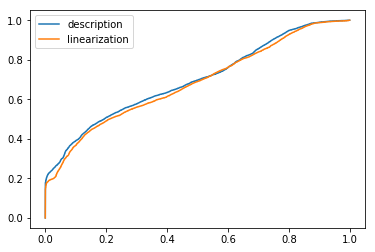

description
linearization


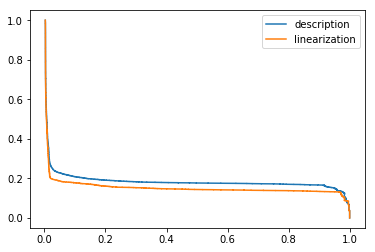

In [14]:
plot_curves(dfs)

description


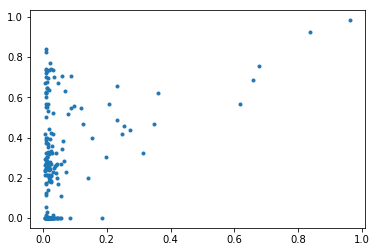

linearization


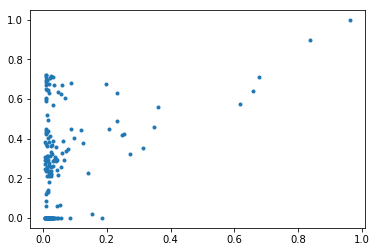

In [19]:
plot_fraction_positive(counts, dfs, code_subset)

In [25]:
df_scores = {model:calculate_all_scores(df) for model,df in dfs.items()}

100%|██████████| 3310/3310 [13:34<00:00,  4.40it/s]


In [8]:
ds_scores

{"('ICD10', 'B480')": (0.0, 0.0, 0.0),
 "('ICD10', 'V80929A')": (0.0, 0.0, 0.0),
 "('ICD10', 'A362')": (0.0, 0.0, 0.0),
 "('ICD10', 'B582')": (0.0, 0.0, 0.0),
 "('ICD10', 'C07')": (0.0, 0.0, 0.0),
 "('ICD10', 'C4440')": (0.0, 0.0, 0.0),
 "('ICD10', 'C9629')": (0.0, 0.0, 0.0),
 "('ICD10', 'A5042')": (0.0, 0.0, 0.0),
 "('ICD10', 'I808')": (0.0, 0.0, 0.0),
 "('ICD10', 'Y847')": (0.0, 0.0, 0.0),
 "('ICD10', 'Y839')": (0.0, 0.0, 0.0),
 "('ICD10', 'A7740')": (0.0, 0.0, 0.0),
 "('ICD10', 'Y92199')": (0.0, 0.0, 0.0),
 "('ICD10', 'B469')": (0.0, 0.0, 0.0),
 'E990-E999': (0.0, 0.0, 0.0),
 "('ICD10', 'V0590XA')": (0.0, 0.0, 0.0),
 "('ICD10', 'I7100')": (0.0, 0.0, 0.0),
 "('ICD10', 'E1165')": (0.0, 0.0, 0.0),
 "('ICD10', 'W57XXXA')": (0.0, 0.0, 0.0),
 "('ICD10', 'B664')": (0.0, 0.0, 0.0),
 "('ICD10', 'V8652XA')": (0.0, 0.0, 0.0),
 "('ICD10', 'B72')": (0.0, 0.0, 0.0),
 "('ICD10', 'Y36470A')": (0.0, 0.0, 0.0),
 '434.11': (0.0, 0.0, 0.0),
 "('ICD10', 'D239')": (0.0, 0.0, 0.0),
 "('ICD10', 'Y9312')": 

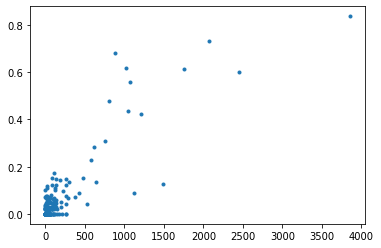

In [9]:
plt.plot([counts[k][1] for k,v in ds_scores.items()], [v[2] for k,v in ds_scores.items()],'.')
plt.show()

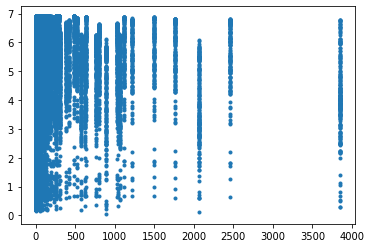

In [10]:
plt.plot(ds.code_frequency,ds.attention,'.')
# plt.plot(ls.code_frequency,ls.attention,'.')

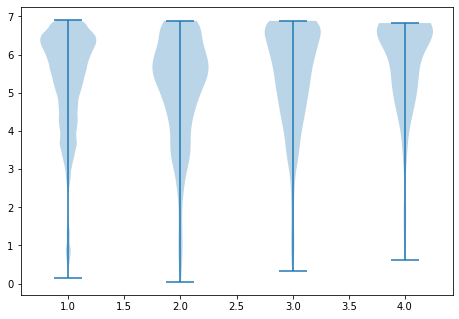

In [11]:
window = 500
df0 = ds
data_to_plot = [df0.attention[(df0.code_frequency >= offset) & (df0.code_frequency < offset+window)].to_numpy() for offset in range(0,2000,window)]
fig = create_violin_plot(data_to_plot)


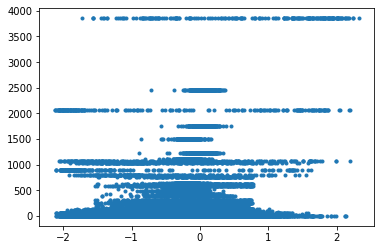

In [12]:
plt.plot(ds.score,ds.code_frequency,'.')

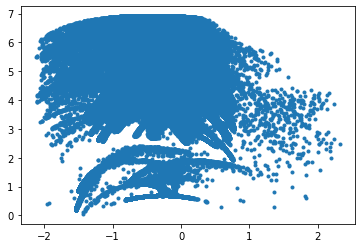

In [13]:
plt.plot(ds.score,ds.attention,'.')

lambda df: (df.code_name=="Vascular") | (df.code_name=="Metabolic and Endocrine") | (df.code_name=="420-429") | (df.code_name=="401-405") | (df.code_name=="270-279") | (df.code_name=="('ICD10', 'I10')") | (df.code_name=="249-259") | (df.code_name=="('ICD10', 'I509')") | (df.code_name=="Infection") | (df.code_name=="410-414") | (df.code_name=="('ICD10', 'I4891')") | (df.code_name=="('ICD10', 'I2510')") | (df.code_name=="030-041") | (df.code_name=="('ICD10', 'E119')") | (df.code_name=="('ICD10', 'A419')") | (df.code_name=="Neoplasm") | (df.code_name=="285") | (df.code_name=="('ICD10', 'E784')") | (df.code_name=="240-246") | (df.code_name=="('ICD10', 'E039')")


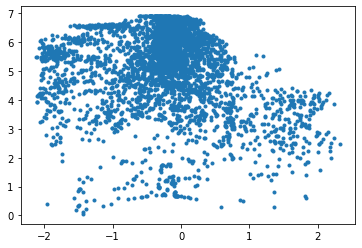

In [14]:
selection = "lambda df: "+(" | ".join("(df.code_name==\""+c+"\")" for c in code_subset[:20]))
print(selection)
df0 = ds[eval(selection)(ds)]
plt.plot(df0.score,df0.attention,'.')

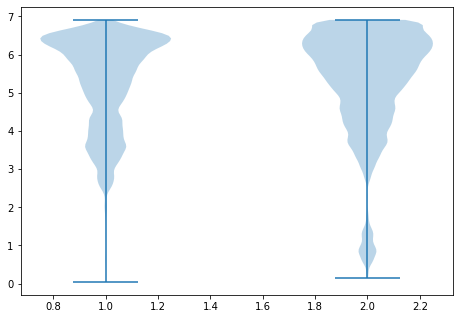

In [37]:
data_to_plot = [ds.attention[ds.label!=(ds.score>0)].to_numpy(), ds.attention[ds.label==(ds.score>0)].to_numpy()]
fig = create_violin_plot(data_to_plot)

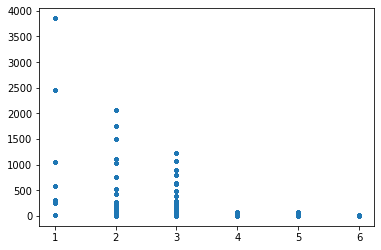

In [16]:
plt.plot(ds.depth,ds.code_frequency,'.')

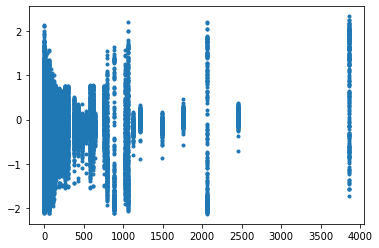

In [17]:
plt.plot(ds.code_frequency,ds.score,'.')

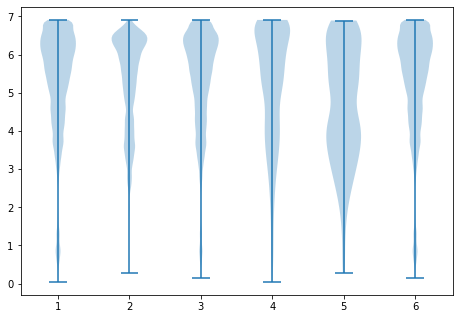

In [18]:
df0 = ds
data_to_plot = [df0.attention[df0.score < 0].to_numpy(), df0.attention[df0.score > 0].to_numpy(), df0.attention[df0.label == 0].to_numpy(), df0.attention[df0.label == 1].to_numpy(), df0.attention[(df0.label == 1) & (df0.score > 0)].to_numpy(), df0.attention[(df0.label == 0) & (df0.score < 0)].to_numpy()]
f = create_violin_plot(data_to_plot)

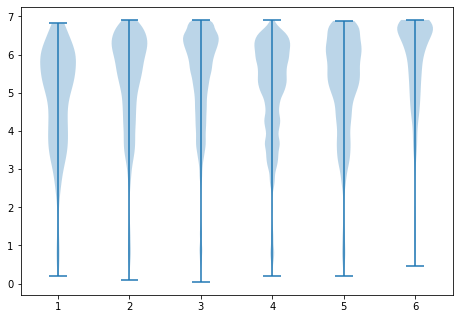

In [19]:
df0 = ds
data_to_plot = [df0.attention[df0.depth == i].to_numpy() for i in sorted(list(set(df0.depth)))]
f = create_violin_plot(data_to_plot)

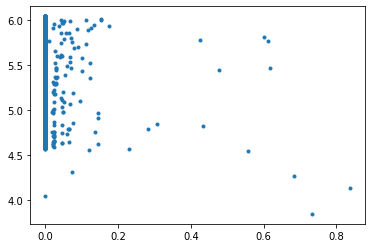

In [20]:
f1s, attention = zip(*[(v[2],ds.attention[ds.code_name==k].mean()) for k,v in ds_scores.items()])
plt.plot(f1s, attention, '.')